In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피쳐 이름 index와 피쳐 명이 공액으로 분리되어 있기 대문에 이를 dataframe으로 로드한다
feature_name_df = pd.read_csv(r"C:\data\human_activity\features.txt", sep='\s+', header = None, names = ['column_index', 'column_name'])



#피쳐명 인덱스를 제거하고 피쳐명만 리스트 객체로 생성한뒤 샘플 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print("전체 피쳐명에서 10개만 추출 : ",feature_name[:10])

전체 피쳐명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()

print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [1]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name","dup_cnt"]].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                             if x[1] >0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [2]:
import pandas as pd

def get_human_dataset( ):
    feature_name_df = pd.read_csv(r"C:\data\human_activity\features.txt", sep='\s+', header = None, names = ['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv(r"C:\data\human_activity\train\X_train.txt", sep='\s+', names = feature_name)
    X_test = pd.read_csv(r"C:\data\human_activity\test\X_test.txt", sep='\s+', names = feature_name)
    
    y_train = pd.read_csv(r"C:\data\human_activity\train\y_train.txt", sep='\s+', header = None, names = ['action'])
    y_test = pd.read_csv(r"C:\data\human_activity\test\y_test.txt", sep='\s+', header = None, names = ['action'])
    
    
    return X_train,X_test, y_train,y_test

X_train, X_test,y_train,y_test = get_human_dataset( )

In [7]:
print("## 학습 피쳐 데이터셋 info()")
print(X_train.info())

## 학습 피쳐 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [8]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


### 결정트리를 사용한 동작 예측 분류

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("결정트리 예측 정확도 : {0:.4f}".format(accuracy))

#결정 트리 하이퍼파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼파라미터 : \n", dt_clf.get_params())

결정트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [13]:
#하이퍼파라미터 튜닝을 통해 최적의 depth 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 파라미터 : ",grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8513


AttributeError: 'str' object has no attribute 'grid_cv'

In [14]:
print("GridSearchCV 최적 파라미터 : ",grid_cv.best_params_)

GridSearchCV 최적 파라미터 :  {'max_depth': 16}


In [15]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [16]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth= depth,random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    print("max_dept : {0}, 예측 정확도 : {1:.4f}".format(depth, accuracy))

max_dept : 6, 예측 정확도 : 0.8558
max_dept : 8, 예측 정확도 : 0.8707
max_dept : 10, 예측 정확도 : 0.8673
max_dept : 12, 예측 정확도 : 0.8646
max_dept : 16, 예측 정확도 : 0.8575
max_dept : 20, 예측 정확도 : 0.8548
max_dept : 24, 예측 정확도 : 0.8548


In [19]:

params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
    
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 파라미터 : ",grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print("결정트리 예측 정확도 : {0:.4f}".format(accuracy))

결정트리 예측 정확도 : 0.8717


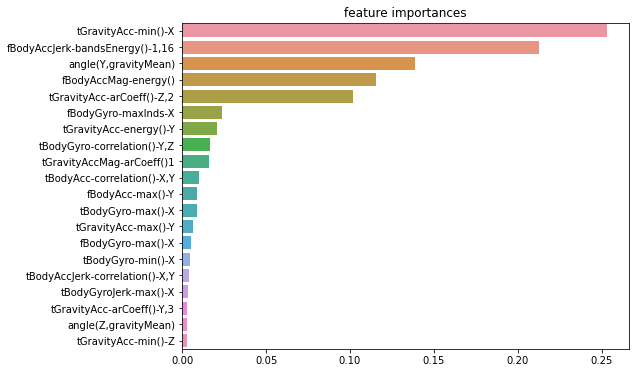

In [22]:
#각 피쳐의 중요도 표현

import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### 배깅 - 랜덤포레스트

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.9253


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
    
}

rf_clf = RandomForestClassifier(random_state = 0 , n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2,n_jobs = -1 )
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 \n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [9]:
rf_clf1 = RandomForestClassifier(n_estimators = 300,max_depth = 10,min_samples_leaf = 8,min_samples_split=8, random_state = 0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9165


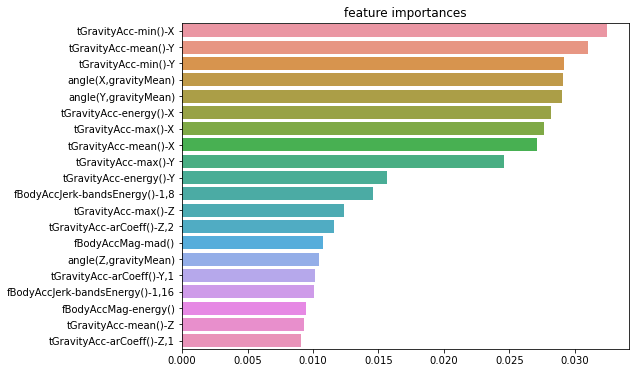

In [10]:
#피쳐 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()


### GBM

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred )

print("GBM 정확도 : {0:.4f}".format(gb_accuracy))
print("GBM 수행시간 : {0:.1f}".format(time.time() - start_time))

GBM 정확도 : 0.9389
GBM 수행시간 : 539.0


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05,0.1]
    
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose = 1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 \n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
